## Import packages

In [2]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


## Load data

In [5]:
YouTube = pd.read_csv("YouTubeChannels_Python.csv")

YouTube.head()

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,0,SET India,27323,31180559,22675948293
4,5th,0,WWE,36756,32852346,26273668433


In [17]:
YouTube.count()

Rank             5000
Gr2de            5000
Channel name     5000
Video Uploads    5000
Subscribers      5000
Video views      5000
dtype: int64

## Question setup

In [3]:
# determine if there is a difference in the number of views (Video views differs between all the
# different grade categories (Grade)

## Data Wrangling

### Subsetting to Only the Variables Needed


In [6]:
# You only want to keep the two variables you'll need in your test: Grade and Video Reviews.

YouTube1 = YouTube[['Gr2de','Video views']]

In [8]:
# Both variable are integers.

## Running the assumptions

In [16]:
# If the assumptions are not met for ANOVA, but you proceeded anyway, you run the risk of biasing your results.

### Normality

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Video views', ylabel='Density'>

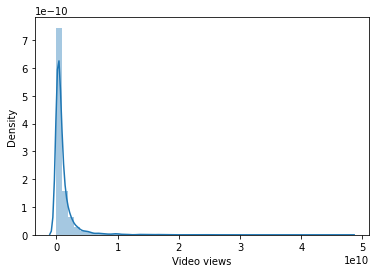

In [9]:
# You only need to test for the normality of the dependent variable, since the IV is categorical.

sns.distplot(YouTube1['Video views'])

In [22]:
# sns.displot(data = apps4, x = 'Reviews', kde = True)

In [11]:
# Looks like that isn't normal in any way - it is very highly positively skewed. So, you'll need to transform 
# review by taking the square root or the log.

YouTube1['Video viewsSQRT'] = np.sqrt(YouTube1['Video views'])

/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_16242/1650177647.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YouTube1['Video viewsSQRT'] = np.sqrt(YouTube1['Video views'])


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Video viewsSQRT', ylabel='Density'>

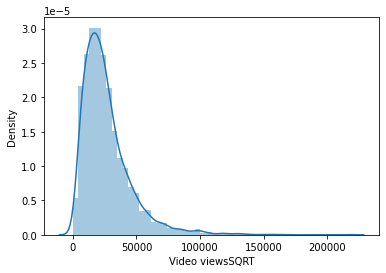

In [13]:
# Plotting

sns.distplot(YouTube1['Video viewsSQRT'])

In [18]:
# That looks relatively normal, let's try for log:

In [19]:
YouTube1['Video viewsLOG'] = np.log(YouTube1['Video views'])

/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_16242/2740910117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YouTube1['Video viewsLOG'] = np.log(YouTube1['Video views'])


/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Video viewsLOG', ylabel='Density'>

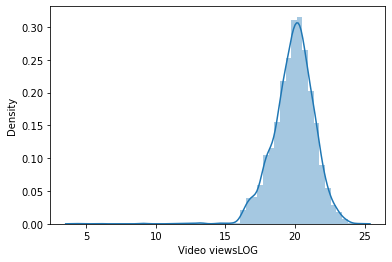

In [20]:
# Plotting

sns.distplot(YouTube1['Video viewsLOG'])

In [21]:
# Let's keep the log, it looks more normal

## Homogeneity of Variance

In [27]:
# Just like in R, you can test for homogeneity of variance easily using either Bartlett's test or Fligner's Test. Bartlett's test is for when your data is normally distributed, and Fligner's test is for when your data is non-parametric. No matter which test you are using, you are looking for a non-significant test. The null hypothesis for both of these is that the data has equal variance, so you'd like to have a p value of > .05. Since you have corrected your data, you can use Bartlett's test, but just for learning purposes, you'll try both here.

### Bartlett's Test


In [22]:
# To do Bartlett's test, use the function scipy.stats.bartlett(), with the argument of the y data,
# followed by the x data.

scipy.stats.bartlett(YouTube1['Video viewsLOG'], YouTube1['Gr2de'])


BartlettResult(statistic=4642.606911455518, pvalue=0.0)

In [29]:
# The p value associated with this test is < .05, which means that unfortunately, you have violated the assumption
# of homogeneity of variance.

### Fligner's Test


In [23]:
# To perform Fligner's test, use the function scipy.stats.fligner(), with the argument of the y data, followed by the x data.

scipy.stats.fligner(YouTube1['Video viewsLOG'], YouTube1['Gr2de'])

FlignerResult(statistic=2200.0468371244633, pvalue=0.0)

In [31]:
# The p value is still < .05, which means you have violated the assumption of homogeneity of variance.

### Correcting for Violations of Homogeneity of Variance


In [32]:
# As you know, there are many different ways to correct for this violation in the general field of statistics. 
# However, Python does not support any of them! Which means that you can run the ANOVA, but there is a good 
# chance it will be inaccurate. If you do choose to proceed with the analysis in Python, ensure that all
# parties consuming your results understand that there could be inaccuracies with the data analysis!

# It is recommended, however, that if you violate the assumption of homogeneity of variance that you switch over
# to R, and proceed from there. You are becoming a guru in both languages for a reason!

### Sample Size

In [33]:
# An ANOVA requires a sample size of at least 20 per independent variable. In this case, you only have one 
# independent variable, so as long as you have at least 20 cases, you are fine. Looking at the data, the n is 5000, 
# so you are fine to proceed with this assumption!

### Independence

In [35]:
### There is no statistical test for the assumption of independence, so you can proceed!



## Computing ANOVAs with Equal Variance (Met Homogeneity of Variance Assumption)


In [36]:
# In this case, your data did not meet this assumption, but for the purposes of learning, you'll be 
# shown what to do if you had.

# Below is the code to run a one-way ANOVA in Python. It uses the function stats.f_oneway() and the arguments
# are the three categories, crossed with your dependent variable. So here your DV is listed out, followed by the 
# first level of your IV. Each level is separated by a comma:

In [25]:
YouTube1.dropna(inplace=True)

/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_16242/1690347832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YouTube1.dropna(inplace=True)


In [26]:
# Change Grade to a Letter for Running the ANOVA

def Grade (val_grade): 
    if val_grade == 0: 
        return "A plus plus"
    if val_grade == 1: 
        return "A plus"
    if val_grade == 2: 
        return "A"
    if val_grade == 3:
        return "B plus"

YouTube1['GradeR'] = YouTube1['Gr2de'].apply(Grade)

/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T/ipykernel_16242/2462602987.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YouTube1['GradeR'] = YouTube1['Gr2de'].apply(Grade)


In [27]:
stats.f_oneway(YouTube1['Video viewsLOG'][YouTube1['GradeR']=='A plus plus'],
                   YouTube1['Video viewsLOG'][YouTube1['GradeR']=='A plus'],
               YouTube1['Video viewsLOG'][YouTube1['GradeR']=='A'],
               YouTube1['Video viewsLOG'][YouTube1['GradeR']=='B plus'])


F_onewayResult(statistic=283.85148674568444, pvalue=3.895240835935201e-170)

In [38]:
# Since the p value is less than .05, there is a significant difference in Views between thegrades



## Computing ANOVAs with Unequal Variance (Violated Homogeneity of Variance Assumption)

In [39]:
# There is NO WAY to compute ANOVAs with unequal variance in Python! Either switch over to R or be 
# VERY CAUTIOUS when interpreting your results and don't use for anything high stakes!



## Post Hocs

In [40]:
# It's important to run post-hocs to figure out what groups significantly differed from each other.
# In Python, the only automatically coding for post-hocs that is available is the Tukey post hoc, 
# so that is what you will learn.



### Computing Post Hocs with Tukey's


In [29]:
# Here is the code for computing a Tukey's post hoc in Python:

postHoc = MultiComparison(YouTube1['Video viewsLOG'], YouTube1['Gr2de'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.5233 0.0085   -2.76 -0.2865   True
     0      2   -3.103    0.0 -4.2146 -1.9913   True
     0      3  -4.1291   -0.0 -5.2399 -3.0184   True
     1      2  -1.5797   -0.0  -2.133 -1.0264   True
     1      3  -2.6059   -0.0 -3.1573 -2.0544   True
     2      3  -1.0262   -0.0 -1.1278 -0.9245   True
----------------------------------------------------


In [42]:
 # If the value in the reject column is True, then this means there was a significant difference in the means
    # between those groups. So, there is a significant difference between the number of views for different grades.
    # What is that difference? Well, you will have to examine
# the means.



### Computing Post Hocs When You've Violated the Assumption of Homogeneity of Variance

In [43]:
# There is NO WAY to compute post hocs with unequal variance in Python! Either switch over to R or be VERY CAUTIOUS when interpreting your results and don't use for anything high stakes!



## Determine Means and Draw Conclusions


In [35]:
# The last step is just to examine the means, to determine which apps had the highest and lowest number of reviews.

YouTube1.groupby('Gr2de').mean()


,Video views,Video viewsSQRT,Video viewsLOG
Gr2de,,,
0,2.119909e+10,139631.341341,23.578544
1,6.053121e+09,70951.341638,22.055279
2,1.676207e+09,34678.089608,20.475580
3,5.265217e+08,19943.101566,19.449400


In [33]:
YouTube1.drop('Video viewsSQRT', axis = 1)

,Gr2de,Video views,Video viewsLOG,GradeR
0,0,20869786591,23.761568,A plus plus
1,0,47548839843,24.585023,A plus plus
2,0,9793305082,23.004965,A plus plus
3,0,22675948293,23.844571,A plus plus
4,0,26273668433,23.991833,A plus plus
...,...,...,...,...
4995,3,441202795,19.905015,B plus
4996,3,377331722,19.748635,B plus
4997,3,311758426,19.557739,B plus
4998,3,14563764,16.494047,B plus


In [ ]:
## ## All grades of YouTube videos significantly differed from each other, with the higher ratings seeming to get the most reviews.